In [1]:
#import packages
import numpy as np
import pandas as pd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# import sklearn packages for modelling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings   #To ignore any warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline

In [2]:
#load data into dataframe
df = pd.read_csv('CloutDataSet_clean.csv')

In [3]:
#changing taget attribute to numeric
di = {'Failed': 0, 'Success': 1}
df['Company-Status'].replace(di, inplace=True)
#Dropping Date column 
df = df.drop('Last Funding Date', axis =1)
df = df.drop('Est. Founding Date', axis =1)

#'Short-Description' and 'Investors' contains many unique values which is not good for model we drop the columns
df = df.drop('Short-Description', axis =1)
df = df.drop('Investors', axis =1)

In [4]:
# we remove target attribute form datafram
df_train = df.copy()

target = df_train["Company-Status"]

X = df_train.drop('Company-Status', axis = 1)
y = target
train = pd.get_dummies(X)

In [5]:

# Split the data into training set (to train the model) and testing set (to test the model)
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.25,random_state=40)

In [6]:
#Feature Scaling using Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=with%20sample%20code).-,ROC%20Curves%20and%20AUC%20in%20Python,probabilities%20for%20the%201%20class.&text=The%20AUC%20for%20the%20ROC,using%20the%20roc_auc_score()%20function.
#Importing Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


# Performing predictions on validation dataset
logmodel = RandomForestClassifier(n_estimators=100)

logmodel.fit(X_train,y_train)

# predict target
predictions_log = logmodel.predict(X_test)

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, predictions_log)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions_log)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Using score method to get accuracy of model
accu_log = logmodel.score(X_test, y_test)
#Printing accuracy score
print(accu_log)

No Skill: ROC AUC=0.500
Gradient boosting: ROC AUC=0.871


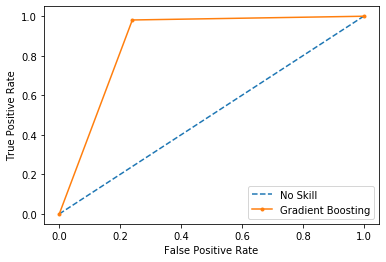

0.9102564102564102


In [7]:
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=with%20sample%20code).-,ROC%20Curves%20and%20AUC%20in%20Python,probabilities%20for%20the%201%20class.&text=The%20AUC%20for%20the%20ROC,using%20the%20roc_auc_score()%20function.
#Importing Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]



# Performing predictions on validation dataset
gbcmodel = GradientBoostingClassifier(learning_rate=0.2, n_estimators=100,max_depth=3,
                                      min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)

gbcmodel.fit(X_train,y_train)

# predict target
predictions_gbc = gbcmodel.predict(X_test)

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, predictions_gbc)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient boosting: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions_gbc)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Using score method to get accuracy of model
accu_log = gbcmodel.score(X_test, y_test)
#Printing accuracy score
print(accu_log)

# Tuning of GBC

In [8]:
#https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/#:~:text=Introduction,used%20when%20doing%20gradient%20boosting.
learning_rate_list = [0.05, 0.075, 0.1, 0.2, 0.4, 0.5, 0.75, 1]

for learning_rate in learning_rate_list:
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=3, random_state=10)
    gbc.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbc.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gbc.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.855
Accuracy score (validation): 0.782
Learning rate:  0.075
Accuracy score (training): 0.897
Accuracy score (validation): 0.833
Learning rate:  0.1
Accuracy score (training): 0.936
Accuracy score (validation): 0.859
Learning rate:  0.2
Accuracy score (training): 0.970
Accuracy score (validation): 0.897
Learning rate:  0.4
Accuracy score (training): 0.996
Accuracy score (validation): 0.910
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.859
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.833
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.833


# Main focused is the accuracy on testing dataset and ls=0.4 is giving us the best performance on training and testing set

In [9]:
#Checking the accuracy by generating confusion matrix

gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.4, max_features=2, max_depth=3, random_state=10)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[20  5]
 [ 2 51]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.91      0.96      0.94        53

    accuracy                           0.91        78
   macro avg       0.91      0.88      0.89        78
weighted avg       0.91      0.91      0.91        78



Gradient boosting: ROC AUC=0.881


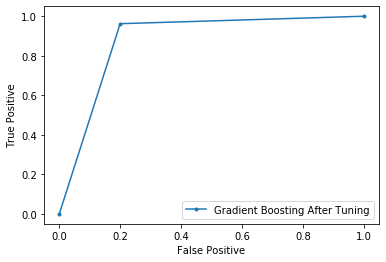

In [10]:
# calculate scores
auc2 = roc_auc_score(y_test, predictions)
# summarize scores
print('Gradient boosting: ROC AUC=%.3f' % (auc2))
# calculate roc curves
fpr2, tpr2, _ = roc_curve(y_test, predictions)
# plot the roc curve for the model
pyplot.plot(fpr2, tpr2, marker='.', label='Gradient Boosting After Tuning')
# labels
pyplot.xlabel('False Positive')
pyplot.ylabel('True Positive')
# show legend
pyplot.legend()
#save the plot
plt.savefig('Final_ROC_GBC',dpi=300)
# show plot
pyplot.show()